## Digit recognition - Neural networks

In [1]:
import numpy as np
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tensorflow.autograph.set_verbosity(0)

## Numpy Zip File (npz)

In [2]:
def load_data(path):
    with np.load(path) as f:
        x_train, y_train = f['x_train'], f['y_train']
        x_test, y_test = f['x_test'], f['y_test']
        return (x_train, y_train), (x_test, y_test)

(x_train, y_train), (x_test, y_test) = load_data('mnist.npz')

### Data Shapes

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Visualize the results

(60000, 784)


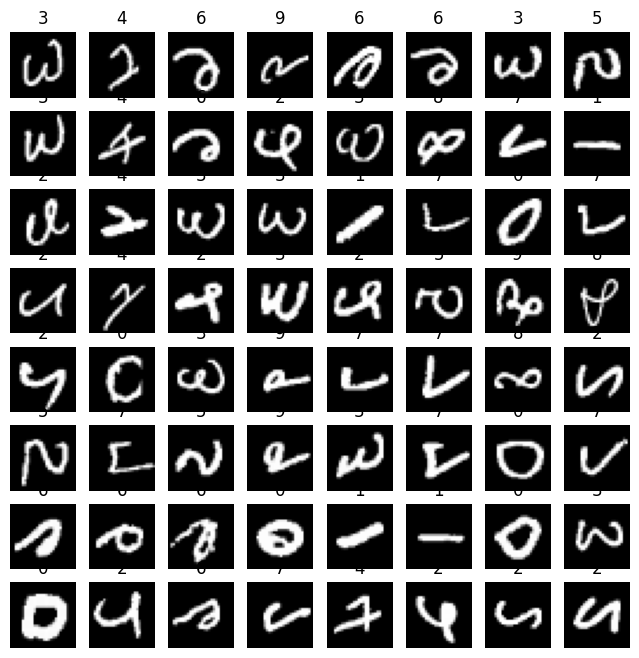

In [4]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
x_train_shaped = x_train.reshape(x_train.shape[0], -1)
y_train_shaped = y_train.reshape(y_train.shape[0], -1)
print(x_train_shaped.shape)
m, n = x_train_shaped.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    x_random_reshaped = x_train_shaped[random_index].reshape((28, 28)).T
    ax.imshow(x_random_reshaped, cmap = 'gray')
    ax.set_title(y_train_shaped[random_index, 0])
    ax.set_axis_off()

![fishy](./NN_view.png)

In [35]:
model = Sequential(
    [
        tensorflow.keras.Input(shape=(784,)),
        Dense(25, activation='sigmoid'),
        Dense(15, activation='sigmoid'),
        Dense(1, activation='sigmoid'),
    ], name = "my_model"
)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                19625     
                                                                 
 dense_13 (Dense)            (None, 15)                390       
                                                                 
 dense_14 (Dense)            (None, 1)                 16        
                                                                 
Total params: 20031 (78.25 KB)
Trainable params: 20031 (78.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
layer1_params = 784 * 25 + 25
layer2_params = 25*15 + 15
layer3_params = 15*1 + 1
print("Layer-1: ", layer1_params, "Layer-2: ", layer2_params, "Layer-3: ", layer3_params)
[layer1, layer2, layer3] = model.layers
W1, b1 = layer1.get_weights()
W2, b2 = layer2.get_weights()
W3, b3 = layer3.get_weights()
print(f"W1, b1 = {W1.shape, b1.shape}")
print(f"W2, b2 = {W2.shape, b2.shape}")
print(f"W3, b3 = {W3.shape, b3.shape}")
print(x_train_shaped.shape)
print(y_train_shaped.shape)

Layer-1:  19625 Layer-2:  390 Layer-3:  16
W1, b1 = ((784, 25), (25,))
W2, b2 = ((25, 15), (15,))
W3, b3 = ((15, 1), (1,))
(60000, 784)
(60000, 1)


In [37]:
print(model.layers[2].weights)

[<tf.Variable 'dense_14/kernel:0' shape=(15, 1) dtype=float32, numpy=
array([[-0.13125676],
       [ 0.5183689 ],
       [ 0.4373725 ],
       [-0.09269691],
       [-0.37044638],
       [-0.05165237],
       [-0.39756122],
       [ 0.27607995],
       [-0.3486502 ],
       [ 0.43307382],
       [-0.37323833],
       [ 0.27690572],
       [ 0.04004484],
       [ 0.24961185],
       [-0.09850276]], dtype=float32)>, <tf.Variable 'dense_14/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>]


In [42]:
model.compile(
    loss = tensorflow.keras.losses.BinaryCrossentropy(),
    optimizer = tensorflow.keras.optimizers.Adam(0.001), )

In [43]:
model.fit(x_train_shaped, y_train_shaped, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 3s 1ms/step - loss: -48.0698
Epoch 2/20
1875/1875 [==============================] - 2s 1ms/step - loss: -135.0128
Epoch 3/20
1875/1875 [==============================] - 2s 1ms/step - loss: -248.6760
Epoch 4/20
1875/1875 [==============================] - 2s 1ms/step - loss: -356.2585
Epoch 5/20
1875/1875 [==============================] - 2s 1ms/step - loss: -463.7930
Epoch 6/20
1875/1875 [==============================] - 2s 1ms/step - loss: -569.6731
Epoch 7/20
1875/1875 [==============================] - 2s 1ms/step - loss: -674.5768
Epoch 8/20
1875/1875 [==============================] - 2s 1ms/step - loss: -779.8854
Epoch 9/20
1875/1875 [==============================] - 2s 1ms/step - loss: -884.6287
Epoch 10/20
1875/1875 [==============================] - 2s 1ms/step - loss: -989.5464
Epoch 11/20
1875/1875 [==============================] - 2s 1ms/step - loss: -1094.9041
Epoch 12/20
1875/1875 [=============================

In [44]:
prediction1 = model.predict(x_test[1].reshape(1, 784))
print(f"Predicting a zero: {prediction1}")
prediction2 = model.predict(x_test[9999].reshape(1, 784))
print(f"Predicting a one: {prediction2}")

1/1 [==============================] - 0s 97ms/step
Predicting a zero: [[1.]]
1/1 [==============================] - 0s 15ms/step
Predicting a one: [[1.]]


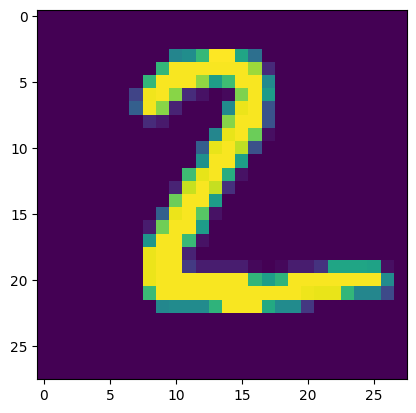

In [45]:
plt.imshow(x_test[1].reshape(28, 28))

ValueError: cannot reshape array of size 614656 into shape (784,1)

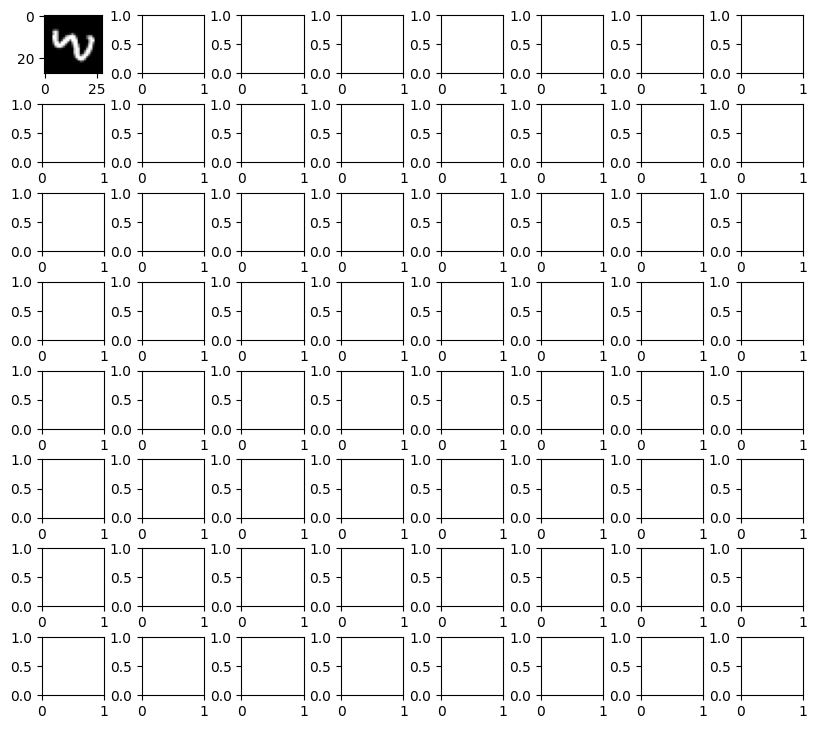

In [46]:
# Some comparison
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

m, n = x_train_shaped.shape
fig, axes = plt.subplots(8, 8, figsize = (8, 8))
fig.tight_layout(pad = 0.1, rect = [0, 0.03, 1, 0.92]) # (left, bot, right, top)
for i, ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    #select random indices
    X_random_reshape = x_train[random_index].reshape((28, 28)).T
    ax.imshow(X_random_reshape, cmap='gray')
    predicts = model.predict(x_train[X_random_reshape].reshape(784, 1))
    if predicts >= 0.5:
        yhat = 1
    else:
        yhat = 0
    
    ax.set_title(f"{y_train[random_index, 0]}, {yhat}")
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize = 16)
plt.show()
